In [1]:
# import the numpy & pandas library
import numpy as np
import pandas as pd

# visualization import
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# define the plot size default
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

# load specific forecasting tools
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.eval_measures import mse,rmse
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (17, 10)
mpl.rcParams['axes.grid'] = False
sns.set_style("whitegrid")


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load datasets
df = pd.read_csv('SensorData.csv')
df

,deviceAddr,tmpc,relh,tvoc,co2p,timeStamp
0,74D285D0D45F,0,0,0,0,9/15/2021 16:08
1,74D285D0D45F,26,53,17,515,9/15/2021 17:08
2,74D285D0D45F,27,51,23,551,9/15/2021 18:08
3,74D285D0D45F,26,50,29,592,9/15/2021 19:08
4,74D285D0D45F,26,49,36,638,9/15/2021 20:09
...,...,...,...,...,...,...
147,74D285D0D45F,22,57,7,446,10/29/2021 13:50
148,74D285D0D45F,21,57,7,451,10/29/2021 14:00
149,74D285D0D45F,21,57,3,425,10/29/2021 14:10
150,74D285D0D45F,21,57,2,416,10/29/2021 14:20


In [217]:
# Let' Check the columns
df.columns

Index(['deviceAddr', 'tmpc', 'relh', 'tvoc', 'co2p', 'timeStamp'], dtype='object')

In [218]:
# Let's remove the unnecessary columns
df1=df[['timeStamp','tmpc','relh','tvoc','co2p']]
df1.head()

,timeStamp,tmpc,relh,tvoc,co2p
0,9/15/2021 16:08,0,0,0,0
1,9/15/2021 17:08,26,53,17,515
2,9/15/2021 18:08,27,51,23,551
3,9/15/2021 19:08,26,50,29,592
4,9/15/2021 20:09,26,49,36,638


In [219]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timeStamp  152 non-null    object
 1   tmpc       152 non-null    int64 
 2   relh       152 non-null    int64 
 3   tvoc       152 non-null    int64 
 4   co2p       152 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.1+ KB


In [220]:
# Change the dtype
df1['timeStamp']= pd.to_datetime(df1['timeStamp'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  152 non-null    datetime64[ns]
 1   tmpc       152 non-null    int64         
 2   relh       152 non-null    int64         
 3   tvoc       152 non-null    int64         
 4   co2p       152 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 6.1 KB


In [221]:
# Let's select the features
features_considered = ['co2p','tvoc','relh','tmpc']

In [222]:
df1.head()

,timeStamp,tmpc,relh,tvoc,co2p
0,2021-09-15 16:08:00,0,0,0,0
1,2021-09-15 17:08:00,26,53,17,515
2,2021-09-15 18:08:00,27,51,23,551
3,2021-09-15 19:08:00,26,50,29,592
4,2021-09-15 20:09:00,26,49,36,638


In [223]:
df1 = df1.rename({'timeStamp': 'date'}, axis=1)  # new method

In [224]:
#Let's change the index column
features = df1[features_considered]
features.index = df1['date']
features.head()

,co2p,tvoc,relh,tmpc
date,,,,
2021-09-15 16:08:00,0,0,0,0
2021-09-15 17:08:00,515,17,53,26
2021-09-15 18:08:00,551,23,51,27
2021-09-15 19:08:00,592,29,50,26
2021-09-15 20:09:00,638,36,49,26


#EDA

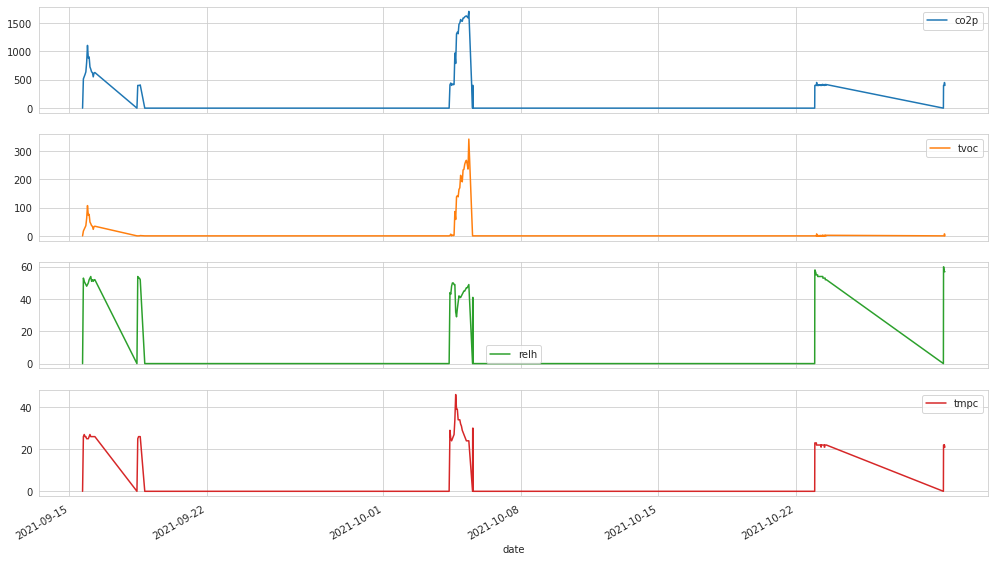

In [225]:
# Plot the graph
features.plot(subplots=True)
plt.show()

In [226]:
#Let's find the correlation 
features.corr()

,co2p,tvoc,relh,tmpc
co2p,1.000000,0.944911,0.154908,0.606410
tvoc,0.944911,1.000000,-0.095493,0.345810
relh,0.154908,-0.095493,1.000000,0.650362
tmpc,0.606410,0.345810,0.650362,1.000000


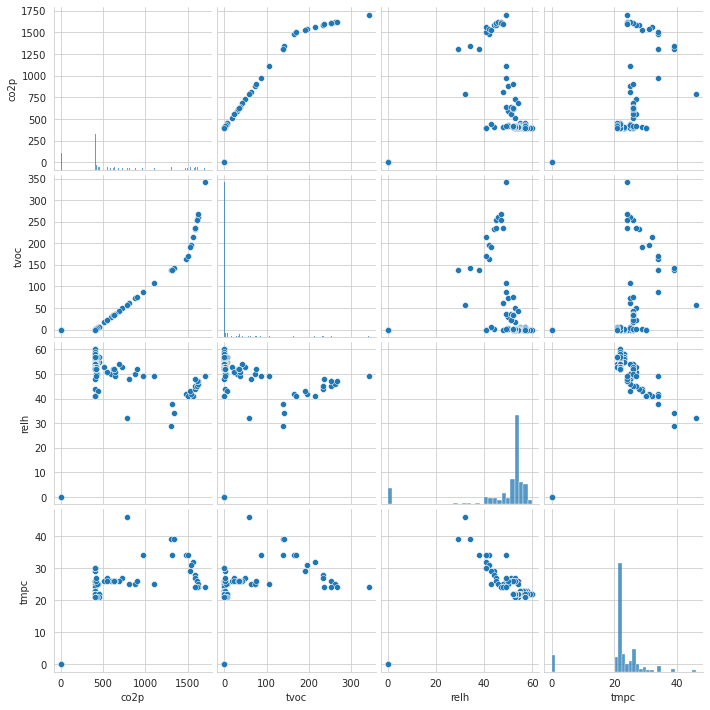

In [227]:
#Visualise the numeric variable
sns.pairplot(features)
plt.show()

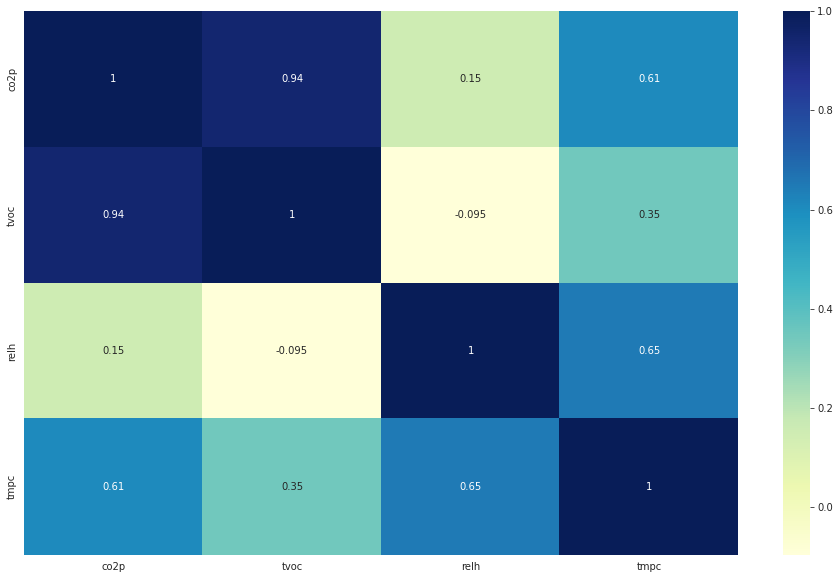

In [228]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(features.corr(), annot = True, cmap="YlGnBu")
plt.show()

1.tvoc and co2 are highly corelated

2.Temp is corelated to tvoc and co2 

##** Note: This dataset has lots of missing values so we are not able to make time-series model**

**Let's take another dataset to train the model**

In [7]:
#import the data
df2=pd.read_csv('datatraining.txt', index_col=0, parse_dates=['date'])

In [8]:
df2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [9]:
#check the shape of data
print(df2.shape)

(8143, 7)


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8143 non-null   datetime64[ns]
 1   Temperature    8143 non-null   float64       
 2   Humidity       8143 non-null   float64       
 3   Light          8143 non-null   float64       
 4   CO2            8143 non-null   float64       
 5   HumidityRatio  8143 non-null   float64       
 6   Occupancy      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 508.9+ KB


## Preprocessing

In [11]:
# Check the description
df2.describe(include='all')

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
unique,8143,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-02-07 17:43:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-02-04 17:51:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-02-10 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,NaN,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,NaN,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,NaN,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8143 non-null   datetime64[ns]
 1   Temperature    8143 non-null   float64       
 2   Humidity       8143 non-null   float64       
 3   Light          8143 non-null   float64       
 4   CO2            8143 non-null   float64       
 5   HumidityRatio  8143 non-null   float64       
 6   Occupancy      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 508.9+ KB


The above output shows the descriptive statistics with mean,median and standard deviation:
Some of the insights might be 

1. There are no missing values.
2. The minimum and maximum temperature throughout for the site ranges between 19 degrees to 23 degrees
3. The Light column  and co2 level indicates towards presence of a lot of outliers due to the large difference between max value and upper quartile value

We are interseted in tempearture,humidity and co2 level so we can remove the unnecessary columns

In [13]:
df2.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [14]:
# Now we have three columns for further forecasting
df2=df2[['date','Temperature','Humidity','CO2']]
df2

,date,Temperature,Humidity,CO2
1,2015-02-04 17:51:00,23.18,27.2720,721.250000
2,2015-02-04 17:51:59,23.15,27.2675,714.000000
3,2015-02-04 17:53:00,23.15,27.2450,713.500000
4,2015-02-04 17:54:00,23.15,27.2000,708.250000
5,2015-02-04 17:55:00,23.10,27.2000,704.500000
...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,787.250000
8140,2015-02-10 09:29:59,21.05,35.9950,789.500000
8141,2015-02-10 09:30:59,21.10,36.0950,798.500000
8142,2015-02-10 09:32:00,21.10,36.2600,820.333333


Let's convert this data into hourly data


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         8143 non-null   datetime64[ns]
 1   Temperature  8143 non-null   float64       
 2   Humidity     8143 non-null   float64       
 3   CO2          8143 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 318.1+ KB


In [16]:
df2.index = df2['date']
df2.head()

,date,Temperature,Humidity,CO2
date,,,,
2015-02-04 17:51:00,2015-02-04 17:51:00,23.18,27.2720,721.25
2015-02-04 17:51:59,2015-02-04 17:51:59,23.15,27.2675,714.00
2015-02-04 17:53:00,2015-02-04 17:53:00,23.15,27.2450,713.50
2015-02-04 17:54:00,2015-02-04 17:54:00,23.15,27.2000,708.25
2015-02-04 17:55:00,2015-02-04 17:55:00,23.10,27.2000,704.50


In [17]:
df2=df2.drop(['date'], axis = 1)


In [18]:
df2

,Temperature,Humidity,CO2
date,,,
2015-02-04 17:51:00,23.18,27.2720,721.250000
2015-02-04 17:51:59,23.15,27.2675,714.000000
2015-02-04 17:53:00,23.15,27.2450,713.500000
2015-02-04 17:54:00,23.15,27.2000,708.250000
2015-02-04 17:55:00,23.10,27.2000,704.500000
...,...,...,...
2015-02-10 09:29:00,21.05,36.0975,787.250000
2015-02-10 09:29:59,21.05,35.9950,789.500000
2015-02-10 09:30:59,21.10,36.0950,798.500000


In [19]:
df2=df2.resample('1H').mean()
df2.head()

,Temperature,Humidity,CO2
date,,,
2015-02-04 17:00:00,23.125556,27.220500,705.833333
2015-02-04 18:00:00,22.626528,27.388278,655.727778
2015-02-04 19:00:00,22.065055,27.181093,572.398907
2015-02-04 20:00:00,21.676780,26.755593,521.048023
2015-02-04 21:00:00,21.478931,25.911694,493.798611


In [20]:
print(df2.shape)

(137, 3)


In [21]:
def dickey_fuller(series,title='Your Dataset'):
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset {title}')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('Data is Stationary')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non stationary')

In [22]:
dickey_fuller(df2['Temperature'],title='Temperature')

Augmented Dickey Fuller Test for the dataset Temperature
ADF test statistics      -3.450904
p-value                   0.009341
#lags                     3.000000
#observations           133.000000
critical value (1%)      -3.480500
critical value (5%)      -2.883528
critical value (10%)     -2.578496
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


Stationary

In [245]:
dickey_fuller(df2['Humidity'],title='Humidity')

Augmented Dickey Fuller Test for the dataset Humidity
ADF test statistics      -1.305993
p-value                   0.626426
#lags                     5.000000
#observations           131.000000
critical value (1%)      -3.481282
critical value (5%)      -2.883868
critical value (10%)     -2.578677
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


non-Stationary

In [23]:
dickey_fuller(df2['CO2'],title='CO2')

Augmented Dickey Fuller Test for the dataset CO2
ADF test statistics      -3.589383
p-value                   0.005967
#lags                     6.000000
#observations           130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


Hence we are good to go with the remaining steps of training, test predictions and finally forecasting into the future.

In [24]:
df2.head()

,Temperature,Humidity,CO2
date,,,
2015-02-04 17:00:00,23.125556,27.220500,705.833333
2015-02-04 18:00:00,22.626528,27.388278,655.727778
2015-02-04 19:00:00,22.065055,27.181093,572.398907
2015-02-04 20:00:00,21.676780,26.755593,521.048023
2015-02-04 21:00:00,21.478931,25.911694,493.798611


In [25]:
# check the length of the transformed df -- > should be 1 rows lesser than the original
len(df2)

137

#Train Test Split

In [26]:
df_train = df2[:int(0.9*(len(df2)))]
df_test = df2[int(0.9*(len(df2))):]

In [27]:
len(df_train), len(df_test)

(123, 14)

VAR Model Order Selection

In [28]:
model = VAR(df_train,freq="1H")
for i in range(10):
    results = model.fit(i+1)
    print('Order = ', i+1)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

Order =  1
AIC:  5.624490963373114
BIC:  5.900296312035402
Order =  2
AIC:  4.091633272112405
BIC:  4.576853118868865
Order =  3
AIC:  3.69765698013895
BIC:  4.394529915834461
Order =  4
AIC:  3.7971117231305196
BIC:  4.7079169015452225
Order =  5
AIC:  3.8357122644090116
BIC:  4.962770416734028
Order =  6
AIC:  3.5269412262405835
BIC:  4.8726157072959
Order =  7
AIC:  3.5699419611526517
BIC:  5.136639828506272
Order =  8
AIC:  3.682973514840963
BIC:  5.473146642034386
Order =  9
AIC:  3.81934257544801
BIC:  5.835488800580796
Order =  10
AIC:  3.8437990429944278
BIC:  6.088463353970071


In [29]:
model.select_order(10).summary()
# AIC is minimum at lag 3
# We can try different values of lags to decrease the RMSE

,AIC,BIC,FPE,HQIC
0,13.69,13.76,8.805e+05,13.72
1,5.831,6.120,340.6,5.948
2,4.239,4.746,69.38,4.445
3,3.856,4.580*,47.35,4.150*
4,3.921,4.863,50.62,4.303
5,3.968,5.127,53.20,4.438
6,3.640*,5.015,38.45*,4.198
7,3.655,5.248,39.26,4.301
8,3.749,5.559,43.43,4.483
9,3.851,5.879,48.56,4.674


In [30]:
model = VAR(df_train, freq="1H")
results = model.fit(2)

In [31]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 14, Dec, 2021
Time:                     13:40:37
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    4.57685
Nobs:                     121.000    HQIC:                   4.28870
Log likelihood:          -741.619    FPE:                    59.8608
AIC:                      4.09163    Det(Omega_mle):         50.5671
--------------------------------------------------------------------
Results for equation Temperature
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  2.160509         0.708231            3.051           0.002
L1.Temperature         1.588190         0.096164           16.515           0.000
L1.Humidity            0.038332         0.041312  

In [34]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(model, 'VAR.pkl')
 
# Load the model from the file
VAR_from_joblib = joblib.load('VAR.pkl')

In [255]:
lag=results.k_ar
lag

2

In [256]:
model.endog_names

['Temperature', 'Humidity', 'CO2']

In [257]:
z=results.forecast(df_train.values[-lag:],steps=12)
z

array([[ 20.17699108,  34.89175303, 823.65597788],
       [ 19.73365702,  34.50454652, 602.42214677],
       [ 19.44805561,  34.4163585 , 472.4982135 ],
       [ 19.28829619,  34.50566222, 415.66287702],
       [ 19.2211767 ,  34.66382765, 410.03642678],
       [ 19.21653544,  34.80858369, 434.81180944],
       [ 19.24958304,  34.88785022, 472.98254692],
       [ 19.30167448,  34.87714579, 512.42224237],
       [ 19.36002029,  34.77352456, 545.79237411],
       [ 19.41678794,  34.58837665, 569.75229285],
       [ 19.46795083,  34.34068265, 583.86821847],
       [ 19.51213507,  34.05161317, 589.50861645]])

In [258]:
idx = pd.date_range(start='02/09/2015',periods=12,freq='1H')
df_forecast = pd.DataFrame(z,index=idx,columns=['Temperature','Humidity','CO2'])

In [259]:
df_forecast

,Temperature,Humidity,CO2
2015-02-09 00:00:00,20.176991,34.891753,823.655978
2015-02-09 01:00:00,19.733657,34.504547,602.422147
2015-02-09 02:00:00,19.448056,34.416359,472.498214
2015-02-09 03:00:00,19.288296,34.505662,415.662877
2015-02-09 04:00:00,19.221177,34.663828,410.036427
2015-02-09 05:00:00,19.216535,34.808584,434.811809
2015-02-09 06:00:00,19.249583,34.887850,472.982547
2015-02-09 07:00:00,19.301674,34.877146,512.422242
2015-02-09 08:00:00,19.360020,34.773525,545.792374
2015-02-09 09:00:00,19.416788,34.588377,569.752293


In [260]:
df_forecast = df_forecast.rename({'Temperature': 'Temperature_pred','Humidity':'Humidity_pred','CO2':'CO2_pred'}, axis=1)

In [261]:
df_forecast

,Temperature_pred,Humidity_pred,CO2_pred
2015-02-09 00:00:00,20.176991,34.891753,823.655978
2015-02-09 01:00:00,19.733657,34.504547,602.422147
2015-02-09 02:00:00,19.448056,34.416359,472.498214
2015-02-09 03:00:00,19.288296,34.505662,415.662877
2015-02-09 04:00:00,19.221177,34.663828,410.036427
2015-02-09 05:00:00,19.216535,34.808584,434.811809
2015-02-09 06:00:00,19.249583,34.887850,472.982547
2015-02-09 07:00:00,19.301674,34.877146,512.422242
2015-02-09 08:00:00,19.360020,34.773525,545.792374
2015-02-09 09:00:00,19.416788,34.588377,569.752293


In [262]:
df_train[-20:-8]['Temperature']

date
2015-02-09 00:00:00    19.452028
2015-02-09 01:00:00    19.406393
2015-02-09 02:00:00    19.398390
2015-02-09 03:00:00    19.360083
2015-02-09 04:00:00    19.317049
2015-02-09 05:00:00    19.436525
2015-02-09 06:00:00    19.378083
2015-02-09 07:00:00    19.413306
2015-02-09 08:00:00    19.528390
2015-02-09 09:00:00    20.260569
2015-02-09 10:00:00    20.866216
2015-02-09 11:00:00    21.272712
Freq: H, Name: Temperature, dtype: float64

#Plot the results

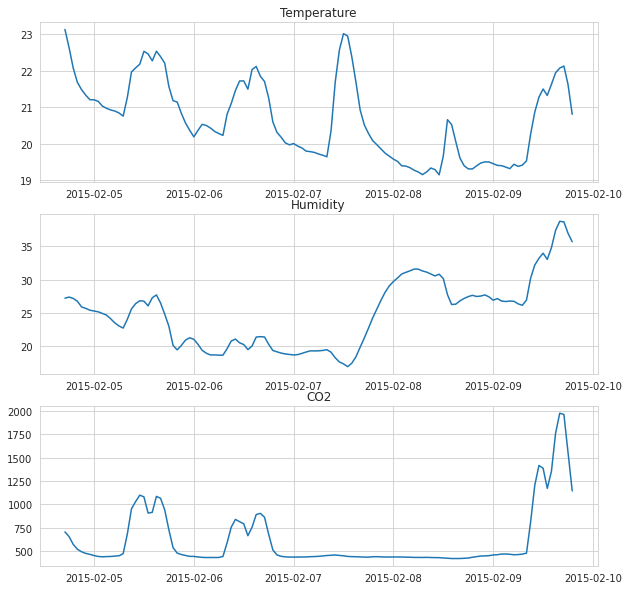

In [263]:
results.plot();

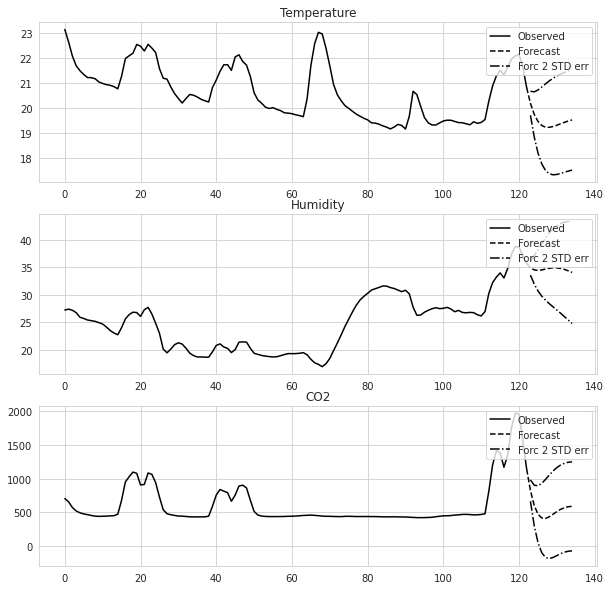

In [264]:
results.plot_forecast(12);

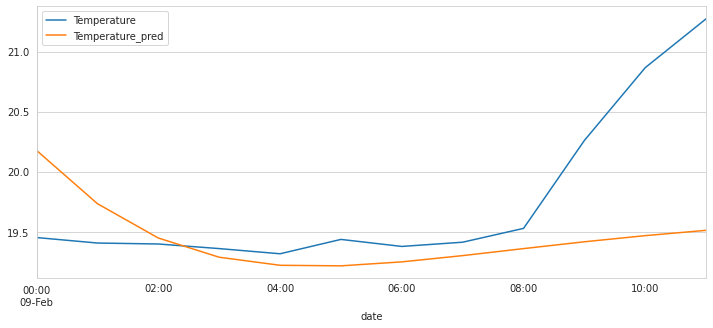

In [265]:
df_train[-20:-8]['Temperature'].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['Temperature_pred'].plot(legend=True);

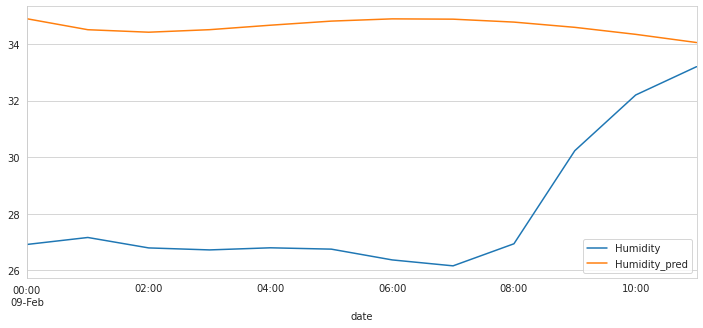

In [266]:
df_train[-20:-8]['Humidity'].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['Humidity_pred'].plot(legend=True);

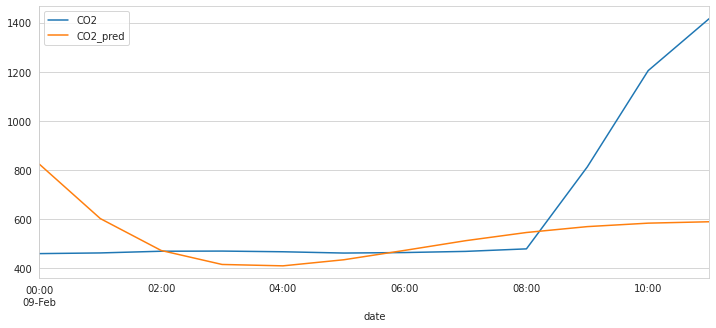

In [267]:
df_train[-20:-8]['CO2'].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CO2_pred'].plot(legend=True);

##Model Evaluation

In [269]:
RMSE_VAR_temp = rmse(df_train[-20:-8]['Temperature'], df_forecast['Temperature_pred'])
print(f'Temperature VAR(5) RMSE: {RMSE_VAR_temp:.3f}')

Temperature VAR(5) RMSE: 0.737


In [270]:
RMSE_VAR_Humidity = rmse(df_train[-20:-8]['Humidity'], df_forecast['Humidity_pred'])
print(f'Humidity VAR(5) RMSE: {RMSE_VAR_Humidity:.3f}')

Humidity VAR(5) RMSE: 7.055


In [271]:
RMSE_VAR_CO2 = rmse(df_train[-20:-8]['CO2'], df_forecast['CO2_pred'])
print(f'CO2 VAR(5) RMSE: {RMSE_VAR_CO2:.3f}')

CO2 VAR(5) RMSE: 328.270


**Let's make a LSTM model**

## LSTM model

In [32]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [33]:
#import the data
df3=pd.read_csv('/content/datatraining.txt', index_col=0, parse_dates=['date'])
df3.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8143 non-null   datetime64[ns]
 1   Temperature    8143 non-null   float64       
 2   Humidity       8143 non-null   float64       
 3   Light          8143 non-null   float64       
 4   CO2            8143 non-null   float64       
 5   HumidityRatio  8143 non-null   float64       
 6   Occupancy      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 508.9+ KB


In [35]:
# Now we have three columns for further forecasting
df3=df3[['date','Temperature','Humidity','CO2']]
df3.head()

,date,Temperature,Humidity,CO2
1,2015-02-04 17:51:00,23.18,27.2720,721.25
2,2015-02-04 17:51:59,23.15,27.2675,714.00
3,2015-02-04 17:53:00,23.15,27.2450,713.50
4,2015-02-04 17:54:00,23.15,27.2000,708.25
5,2015-02-04 17:55:00,23.10,27.2000,704.50


In [36]:
df3.index = df3['date']
df3.head()

,date,Temperature,Humidity,CO2
date,,,,
2015-02-04 17:51:00,2015-02-04 17:51:00,23.18,27.2720,721.25
2015-02-04 17:51:59,2015-02-04 17:51:59,23.15,27.2675,714.00
2015-02-04 17:53:00,2015-02-04 17:53:00,23.15,27.2450,713.50
2015-02-04 17:54:00,2015-02-04 17:54:00,23.15,27.2000,708.25
2015-02-04 17:55:00,2015-02-04 17:55:00,23.10,27.2000,704.50


In [37]:
df3=df3.drop(['date'], axis = 1)
df3.head()

,Temperature,Humidity,CO2
date,,,
2015-02-04 17:51:00,23.18,27.2720,721.25
2015-02-04 17:51:59,23.15,27.2675,714.00
2015-02-04 17:53:00,23.15,27.2450,713.50
2015-02-04 17:54:00,23.15,27.2000,708.25
2015-02-04 17:55:00,23.10,27.2000,704.50


In [ ]:
#Reading after 10mins
#df3=df3.resample('10min').mean()
#df3.head()

In [38]:
# Check the info
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8143 entries, 2015-02-04 17:51:00 to 2015-02-10 09:33:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8143 non-null   float64
 1   Humidity     8143 non-null   float64
 2   CO2          8143 non-null   float64
dtypes: float64(3)
memory usage: 254.5 KB


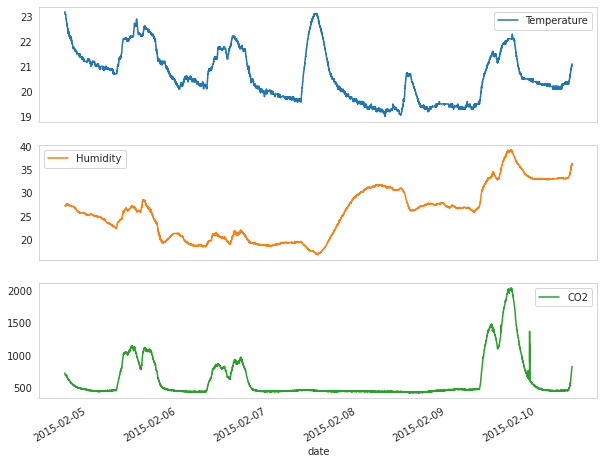

In [39]:
# Let's plot the graph
df3.plot(subplots=True)
plt.show()

#LSTM Multivariate Model Building

Scaling of data

In [40]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df3)

In [41]:
data_scaled

array([[1.        , 0.47053302, 0.190933  ],
       [0.99282297, 0.47033188, 0.18644592],
       [0.99282297, 0.46932618, 0.18613647],
       ...,
       [0.50239234, 0.86490111, 0.23874362],
       [0.50239234, 0.87227623, 0.25225643],
       [0.50239234, 0.86959437, 0.25266904]])

In [42]:
data_scaled[0]

array([1.        , 0.47053302, 0.190933  ])

In [43]:
features=data_scaled
target=data_scaled[:,0]

In [44]:
#temperature,humidity and co2
features

array([[1.        , 0.47053302, 0.190933  ],
       [0.99282297, 0.47033188, 0.18644592],
       [0.99282297, 0.46932618, 0.18613647],
       ...,
       [0.50239234, 0.86490111, 0.23874362],
       [0.50239234, 0.87227623, 0.25225643],
       [0.50239234, 0.86959437, 0.25266904]])

In [45]:
# let's predict the temp
target

array([1.        , 0.99282297, 0.99282297, ..., 0.50239234, 0.50239234,
       0.50239234])

In [46]:
print(target.shape)

(8143,)


In [47]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[1.        , 0.47053302, 0.190933  ],
         [0.99282297, 0.47033188, 0.18644592]]]), array([0.99282297]))

Split the data to trainig and testing data

In [48]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [49]:
# Check the size
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6514, 3)
(1629, 3)
(6514,)
(1629,)


In [50]:
#720input datapoint
win_length=720
batch_size=32
num_features=3
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [51]:
train_generator[0]

(array([[[1.        , 0.47053302, 0.190933  ],
         [0.99282297, 0.47033188, 0.18644592],
         [0.99282297, 0.46932618, 0.18613647],
         ...,
         [0.45215311, 0.29701643, 0.02449843],
         [0.45215311, 0.2994748 , 0.02181649],
         [0.45215311, 0.29701643, 0.02181649]],
 
        [[0.99282297, 0.47033188, 0.18644592],
         [0.99282297, 0.46932618, 0.18613647],
         [0.99282297, 0.46731478, 0.1828872 ],
         ...,
         [0.45215311, 0.2994748 , 0.02181649],
         [0.45215311, 0.29701643, 0.02181649],
         [0.44019139, 0.29723992, 0.02088813]],
 
        [[0.99282297, 0.46932618, 0.18613647],
         [0.99282297, 0.46731478, 0.1828872 ],
         [0.98086124, 0.46731478, 0.1805663 ],
         ...,
         [0.45215311, 0.29701643, 0.02181649],
         [0.44019139, 0.29723992, 0.02088813],
         [0.45215311, 0.29701643, 0.0224354 ]],
 
        ...,
 
        [[0.89593301, 0.4807241 , 0.15921399],
         [0.88516746, 0.47908519, 0.15838

In [52]:
temp_model = tf.keras.Sequential()
temp_model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
temp_model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
temp_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
temp_model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
temp_model.add(tf.keras.layers.Dropout(0.3)) 
temp_model.add(tf.keras.layers.LSTM(64, return_sequences=False))
temp_model.add(tf.keras.layers.Dropout(0.3)) 
temp_model.add(tf.keras.layers.Dense(1))

In [53]:
temp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          67584     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [54]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

temp_model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = temp_model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50
182/182 [==============================] - 367s 2s/step - loss: 0.0141 - mean_absolute_error: 0.0764 - val_loss: 0.0559 - val_mean_absolute_error: 0.2279
Epoch 2/50
182/182 [==============================] - 358s 2s/step - loss: 0.0327 - mean_absolute_error: 0.1192 - val_loss: 0.0598 - val_mean_absolute_error: 0.2374
Epoch 3/50
182/182 [==============================] - 354s 2s/step - loss: 0.0403 - mean_absolute_error: 0.1436 - val_loss: 0.0339 - val_mean_absolute_error: 0.1826
Epoch 4/50
182/182 [==============================] - 356s 2s/step - loss: 0.0220 - mean_absolute_error: 0.1076 - val_loss: 0.0208 - val_mean_absolute_error: 0.1365
Epoch 5/50
182/182 [==============================] - 353s 2s/step - loss: 0.0094 - mean_absolute_error: 0.0677 - val_loss: 0.0160 - val_mean_absolute_error: 0.1202
Epoch 6/50
182/182 [==============================] - 352s 2s/step - loss: 0.0040 - mean_absolute_error: 0.0449 - val_loss: 0.0192 - val_mean_absolute_error: 0.1331
Epoch 7/50

In [55]:
temp_model.evaluate_generator(test_generator, verbose=0)  

[0.01651955395936966, 0.12600168585777283]

In [56]:
temp_predictions=temp_model.predict_generator(test_generator)

In [58]:
temp_predictions.shape[0]

909

In [59]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(temp_model, 'LSTM_Temp_model.pkl')

INFO:tensorflow:Assets written to: ram://838db544-5a6b-4c49-a9cc-a5ce6fe55863/assets


INFO:tensorflow:Assets written to: ram://838db544-5a6b-4c49-a9cc-a5ce6fe55863/assets


['LSTM_Temp_model.pkl']

In [61]:
# Load the model from the file
lstmtemp_from_joblib = joblib.load('LSTM_Temp_model.pkl')

In [62]:
lstmtemp_from_joblib.predict_generator(test_generator)

array([[0.6157145 ],
       [0.61075455],
       [0.60589457],
       [0.60063386],
       [0.59474236],
       [0.5885919 ],
       [0.5826696 ],
       [0.57676065],
       [0.5710397 ],
       [0.56561404],
       [0.5608505 ],
       [0.5562827 ],
       [0.5518594 ],
       [0.5476388 ],
       [0.54384416],
       [0.5394006 ],
       [0.53490615],
       [0.5300857 ],
       [0.52505267],
       [0.52008706],
       [0.5155029 ],
       [0.5108133 ],
       [0.50546104],
       [0.4996462 ],
       [0.49382353],
       [0.4885223 ],
       [0.48398632],
       [0.48034406],
       [0.47644138],
       [0.47201854],
       [0.4674225 ],
       [0.4629265 ],
       [0.45880044],
       [0.45512092],
       [0.45193768],
       [0.44785196],
       [0.44293654],
       [0.4376285 ],
       [0.43240625],
       [0.42639208],
       [0.4204777 ],
       [0.4145856 ],
       [0.4089766 ],
       [0.40403217],
       [0.3999815 ],
       [0.3969069 ],
       [0.39469445],
       [0.393

In [63]:
temp_predictions

array([[0.6157145 ],
       [0.61075455],
       [0.60589457],
       [0.60063386],
       [0.59474236],
       [0.5885919 ],
       [0.5826696 ],
       [0.57676065],
       [0.5710397 ],
       [0.56561404],
       [0.5608505 ],
       [0.5562827 ],
       [0.5518594 ],
       [0.5476388 ],
       [0.54384416],
       [0.5394006 ],
       [0.53490615],
       [0.5300857 ],
       [0.52505267],
       [0.52008706],
       [0.5155029 ],
       [0.5108133 ],
       [0.50546104],
       [0.4996462 ],
       [0.49382353],
       [0.4885223 ],
       [0.48398632],
       [0.48034406],
       [0.47644138],
       [0.47201854],
       [0.4674225 ],
       [0.4629265 ],
       [0.45880044],
       [0.45512092],
       [0.45193768],
       [0.44785196],
       [0.44293654],
       [0.4376285 ],
       [0.43240625],
       [0.42639208],
       [0.4204777 ],
       [0.4145856 ],
       [0.4089766 ],
       [0.40403217],
       [0.3999815 ],
       [0.3969069 ],
       [0.39469445],
       [0.393

#Humidity

In [64]:
target_hum=data_scaled[:,1]
target_hum

array([0.47053302, 0.47033188, 0.46932618, ..., 0.86490111, 0.87227623,
       0.86959437])

In [65]:
#temperature,humidity and co2
features

array([[1.        , 0.47053302, 0.190933  ],
       [0.99282297, 0.47033188, 0.18644592],
       [0.99282297, 0.46932618, 0.18613647],
       ...,
       [0.50239234, 0.86490111, 0.23874362],
       [0.50239234, 0.87227623, 0.25225643],
       [0.50239234, 0.86959437, 0.25266904]])

In [67]:
print(target_hum.shape)

(8143,)


In [68]:
TimeseriesGenerator(features, target_hum, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[1.        , 0.47053302, 0.190933  ],
         [0.99282297, 0.47033188, 0.18644592]]]), array([0.46932618]))

Split the data to trainig and testing data

In [69]:
x_train, x_test, y_train, y_test = train_test_split(features, target_hum, test_size=0.20, random_state=123, shuffle = False)

In [70]:
# Check the size
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6514, 3)
(1629, 3)
(6514,)
(1629,)


In [71]:
#720input datapoint
win_length=720
batch_size=32
num_features=3
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [72]:
train_generator[0]

(array([[[1.        , 0.47053302, 0.190933  ],
         [0.99282297, 0.47033188, 0.18644592],
         [0.99282297, 0.46932618, 0.18613647],
         ...,
         [0.45215311, 0.29701643, 0.02449843],
         [0.45215311, 0.2994748 , 0.02181649],
         [0.45215311, 0.29701643, 0.02181649]],
 
        [[0.99282297, 0.47033188, 0.18644592],
         [0.99282297, 0.46932618, 0.18613647],
         [0.99282297, 0.46731478, 0.1828872 ],
         ...,
         [0.45215311, 0.2994748 , 0.02181649],
         [0.45215311, 0.29701643, 0.02181649],
         [0.44019139, 0.29723992, 0.02088813]],
 
        [[0.99282297, 0.46932618, 0.18613647],
         [0.99282297, 0.46731478, 0.1828872 ],
         [0.98086124, 0.46731478, 0.1805663 ],
         ...,
         [0.45215311, 0.29701643, 0.02181649],
         [0.44019139, 0.29723992, 0.02088813],
         [0.45215311, 0.29701643, 0.0224354 ]],
 
        ...,
 
        [[0.89593301, 0.4807241 , 0.15921399],
         [0.88516746, 0.47908519, 0.15838

In [73]:
hum_model = tf.keras.Sequential()
hum_model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
hum_model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
hum_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
hum_model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
hum_model.add(tf.keras.layers.Dropout(0.3)) 
hum_model.add(tf.keras.layers.LSTM(64, return_sequences=False))
hum_model.add(tf.keras.layers.Dropout(0.3)) 
hum_model.add(tf.keras.layers.Dense(1))

In [74]:
hum_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 720, 128)          67584     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout_2 (Dropout)         (None, 720, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [75]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

hum_model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = hum_model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50
182/182 [==============================] - 362s 2s/step - loss: 0.0067 - mean_absolute_error: 0.0627 - val_loss: 0.0658 - val_mean_absolute_error: 0.2531
Epoch 2/50
182/182 [==============================] - 352s 2s/step - loss: 0.0089 - mean_absolute_error: 0.0701 - val_loss: 0.0974 - val_mean_absolute_error: 0.3089
Epoch 3/50
182/182 [==============================] - 352s 2s/step - loss: 0.0113 - mean_absolute_error: 0.0764 - val_loss: 0.0880 - val_mean_absolute_error: 0.2932


In [76]:
hum_model.evaluate_generator(test_generator, verbose=0)  

[0.08798661082983017, 0.29315391182899475]

In [77]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(hum_model, 'hum_LSTM_model.pkl')

INFO:tensorflow:Assets written to: ram://d30b53eb-5082-41cd-b769-5db0530642c9/assets


INFO:tensorflow:Assets written to: ram://d30b53eb-5082-41cd-b769-5db0530642c9/assets


['hum_LSTM_model.pkl']

In [78]:
hum_predictions=hum_model.predict_generator(test_generator)

In [80]:
hum_predictions.shape[0]

909

In [81]:
hum_predictions

array([[0.46116537],
       [0.4611594 ],
       [0.46112788],
       [0.46109003],
       [0.46106625],
       [0.4610629 ],
       [0.46107697],
       [0.46110332],
       [0.46113795],
       [0.46117902],
       [0.4612112 ],
       [0.4612419 ],
       [0.46127105],
       [0.46128792],
       [0.46129435],
       [0.46131694],
       [0.4613484 ],
       [0.46138674],
       [0.4614249 ],
       [0.46144938],
       [0.46146172],
       [0.46147686],
       [0.461506  ],
       [0.46154422],
       [0.4615937 ],
       [0.46165317],
       [0.46170896],
       [0.46175718],
       [0.46180993],
       [0.46185923],
       [0.46189445],
       [0.461913  ],
       [0.46191627],
       [0.4619066 ],
       [0.46188664],
       [0.46188366],
       [0.4619122 ],
       [0.46196496],
       [0.46202606],
       [0.462103  ],
       [0.46218878],
       [0.4622786 ],
       [0.4623742 ],
       [0.4624691 ],
       [0.4625582 ],
       [0.46263754],
       [0.4627005 ],
       [0.462

#Co2 level

In [82]:
target_co2=data_scaled[:,2]

In [83]:
#temperature,humidity and co2
features

array([[1.        , 0.47053302, 0.190933  ],
       [0.99282297, 0.47033188, 0.18644592],
       [0.99282297, 0.46932618, 0.18613647],
       ...,
       [0.50239234, 0.86490111, 0.23874362],
       [0.50239234, 0.87227623, 0.25225643],
       [0.50239234, 0.86959437, 0.25266904]])

In [84]:
target_co2

array([0.190933  , 0.18644592, 0.18613647, ..., 0.23874362, 0.25225643,
       0.25266904])

In [85]:
print(target_co2.shape)

(8143,)


In [86]:
TimeseriesGenerator(features, target_co2, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[1.        , 0.47053302, 0.190933  ],
         [0.99282297, 0.47033188, 0.18644592]]]), array([0.18613647]))

Split the data to trainig and testing data


In [87]:
x_train, x_test, y_train, y_test = train_test_split(features, target_co2, test_size=0.20, random_state=123, shuffle = False)

In [88]:
# Check the size
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6514, 3)
(1629, 3)
(6514,)
(1629,)


In [89]:
#720input datapoint
win_length=720
batch_size=32
num_features=3
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [90]:
train_generator[0]

(array([[[1.        , 0.47053302, 0.190933  ],
         [0.99282297, 0.47033188, 0.18644592],
         [0.99282297, 0.46932618, 0.18613647],
         ...,
         [0.45215311, 0.29701643, 0.02449843],
         [0.45215311, 0.2994748 , 0.02181649],
         [0.45215311, 0.29701643, 0.02181649]],
 
        [[0.99282297, 0.47033188, 0.18644592],
         [0.99282297, 0.46932618, 0.18613647],
         [0.99282297, 0.46731478, 0.1828872 ],
         ...,
         [0.45215311, 0.2994748 , 0.02181649],
         [0.45215311, 0.29701643, 0.02181649],
         [0.44019139, 0.29723992, 0.02088813]],
 
        [[0.99282297, 0.46932618, 0.18613647],
         [0.99282297, 0.46731478, 0.1828872 ],
         [0.98086124, 0.46731478, 0.1805663 ],
         ...,
         [0.45215311, 0.29701643, 0.02181649],
         [0.44019139, 0.29723992, 0.02088813],
         [0.45215311, 0.29701643, 0.0224354 ]],
 
        ...,
 
        [[0.89593301, 0.4807241 , 0.15921399],
         [0.88516746, 0.47908519, 0.15838

In [91]:
co2_model = tf.keras.Sequential()
co2_model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
co2_model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
co2_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
co2_model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
co2_model.add(tf.keras.layers.Dropout(0.3)) 
co2_model.add(tf.keras.layers.LSTM(64, return_sequences=False))
co2_model.add(tf.keras.layers.Dropout(0.3)) 
co2_model.add(tf.keras.layers.Dense(1))

In [92]:
co2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 720, 128)          67584     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout_4 (Dropout)         (None, 720, 128)          0         
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [93]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

co2_model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = co2_model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50
182/182 [==============================] - 363s 2s/step - loss: 0.0048 - mean_absolute_error: 0.0424 - val_loss: 0.0254 - val_mean_absolute_error: 0.0878
Epoch 2/50
182/182 [==============================] - 353s 2s/step - loss: 0.0070 - mean_absolute_error: 0.0510 - val_loss: 0.0225 - val_mean_absolute_error: 0.0827
Epoch 3/50
182/182 [==============================] - 353s 2s/step - loss: 0.0061 - mean_absolute_error: 0.0461 - val_loss: 0.0179 - val_mean_absolute_error: 0.0789
Epoch 4/50
182/182 [==============================] - 356s 2s/step - loss: 0.0050 - mean_absolute_error: 0.0454 - val_loss: 0.0134 - val_mean_absolute_error: 0.0710
Epoch 5/50
182/182 [==============================] - 355s 2s/step - loss: 0.0032 - mean_absolute_error: 0.0356 - val_loss: 0.0103 - val_mean_absolute_error: 0.0690
Epoch 6/50
182/182 [==============================] - 354s 2s/step - loss: 0.0022 - mean_absolute_error: 0.0297 - val_loss: 0.0092 - val_mean_absolute_error: 0.0671
Epoch 7/50

In [95]:
co2_model.evaluate_generator(test_generator, verbose=0)  

[0.0081302709877491, 0.0728142112493515]

In [94]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(co2_model, 'co2_LSTM_model.pkl')

INFO:tensorflow:Assets written to: ram://37b277b6-29f5-4a69-afb8-c0f3d5d806c2/assets


INFO:tensorflow:Assets written to: ram://37b277b6-29f5-4a69-afb8-c0f3d5d806c2/assets


['co2_LSTM_model.pkl']

In [96]:
co2_predictions=co2_model.predict_generator(test_generator)

In [97]:
co2_predictions.shape[0]

909

In [190]:
co2_predictions

array([[0.36528498],
       [0.3643138 ],
       [0.36317518],
       [0.36196354],
       [0.3607563 ],
       [0.3596389 ],
       [0.35865536],
       [0.3577486 ],
       [0.3569108 ],
       [0.356152  ],
       [0.3554213 ],
       [0.3547159 ],
       [0.35397387],
       [0.35316005],
       [0.35235062],
       [0.35161188],
       [0.35091677],
       [0.35025337],
       [0.34952375],
       [0.34871963],
       [0.34790695],
       [0.34707883],
       [0.34621623],
       [0.34532687],
       [0.34448358],
       [0.34375867],
       [0.34310016],
       [0.34252188],
       [0.34194663],
       [0.34126726],
       [0.34053978],
       [0.33974168],
       [0.33889976],
       [0.33798638],
       [0.3370201 ],
       [0.3359541 ],
       [0.33490965],
       [0.33392605],
       [0.33299014],
       [0.33205944],
       [0.33116642],
       [0.3302929 ],
       [0.32948533],
       [0.32878208],
       [0.3282137 ],
       [0.32775876],
       [0.32733375],
       [0.326

In [191]:
y_test

array([0.02893393, 0.03202847, 0.03357574, ..., 0.23874362, 0.25225643,
       0.25266904])

In [192]:
x_test

array([[0.09330144, 0.43110962, 0.02893393],
       [0.09330144, 0.42887473, 0.03202847],
       [0.09330144, 0.42663985, 0.03357574],
       ...,
       [0.50239234, 0.86490111, 0.23874362],
       [0.50239234, 0.87227623, 0.25225643],
       [0.50239234, 0.86959437, 0.25266904]])

In [193]:
x_test[:,1:][win_length:]

array([[0.90535255, 0.71808758],
       [0.90535255, 0.70117077],
       [0.9023727 , 0.70034556],
       ...,
       [0.86490111, 0.23874362],
       [0.87227623, 0.25225643],
       [0.86959437, 0.25266904]])

In [194]:
df_pred=pd.concat([pd.DataFrame(temp_predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
df_pred

,0,0,1
0,0.615714,0.905353,0.718088
1,0.610755,0.905353,0.701171
2,0.605895,0.902373,0.700346
3,0.600634,0.900883,0.695188
4,0.594742,0.902000,0.694105
...,...,...,...
904,0.321972,0.865013,0.231781
905,0.324220,0.860431,0.233173
906,0.326364,0.864901,0.238744
907,0.328938,0.872276,0.252256


Inverse the scaling

In [195]:
rev_trans=scaler.inverse_transform(df_pred)
rev_trans

array([[  21.57368657,   37.        , 1573.        ],
       [  21.55295402,   37.        , 1545.66666667],
       [  21.53263928,   36.93333333, 1544.33333333],
       ...,
       [  20.36420044,   36.095     ,  798.5       ],
       [  20.37496075,   36.26      ,  820.33333333],
       [  20.38754356,   36.2       ,  821.        ]])

In [196]:
df_final=df3[temp_predictions.shape[0]*-1:]
df_final

,Temperature,Humidity,CO2
date,,,
2015-02-09 18:24:59,21.700000,37.000000,1573.000000
2015-02-09 18:26:00,21.700000,37.000000,1545.666667
2015-02-09 18:27:00,21.633333,36.933333,1544.333333
2015-02-09 18:28:00,21.600000,36.900000,1536.000000
2015-02-09 18:29:00,21.600000,36.925000,1534.250000
...,...,...,...
2015-02-10 09:29:00,21.050000,36.097500,787.250000
2015-02-10 09:29:59,21.050000,35.995000,789.500000
2015-02-10 09:30:59,21.100000,36.095000,798.500000


In [197]:
df_final.count()

Temperature    909
Humidity       909
CO2            909
dtype: int64

In [198]:
df_final['temp_Pred']=rev_trans[:,0]
df_final

,Temperature,Humidity,CO2,temp_Pred
date,,,,
2015-02-09 18:24:59,21.700000,37.000000,1573.000000,21.573687
2015-02-09 18:26:00,21.700000,37.000000,1545.666667,21.552954
2015-02-09 18:27:00,21.633333,36.933333,1544.333333,21.532639
2015-02-09 18:28:00,21.600000,36.900000,1536.000000,21.510650
2015-02-09 18:29:00,21.600000,36.925000,1534.250000,21.486023
...,...,...,...,...
2015-02-10 09:29:00,21.050000,36.097500,787.250000,20.345842
2015-02-10 09:29:59,21.050000,35.995000,789.500000,20.355241
2015-02-10 09:30:59,21.100000,36.095000,798.500000,20.364200


In [199]:
hum_predictions

array([[0.46116537],
       [0.4611594 ],
       [0.46112788],
       [0.46109003],
       [0.46106625],
       [0.4610629 ],
       [0.46107697],
       [0.46110332],
       [0.46113795],
       [0.46117902],
       [0.4612112 ],
       [0.4612419 ],
       [0.46127105],
       [0.46128792],
       [0.46129435],
       [0.46131694],
       [0.4613484 ],
       [0.46138674],
       [0.4614249 ],
       [0.46144938],
       [0.46146172],
       [0.46147686],
       [0.461506  ],
       [0.46154422],
       [0.4615937 ],
       [0.46165317],
       [0.46170896],
       [0.46175718],
       [0.46180993],
       [0.46185923],
       [0.46189445],
       [0.461913  ],
       [0.46191627],
       [0.4619066 ],
       [0.46188664],
       [0.46188366],
       [0.4619122 ],
       [0.46196496],
       [0.46202606],
       [0.462103  ],
       [0.46218878],
       [0.4622786 ],
       [0.4623742 ],
       [0.4624691 ],
       [0.4625582 ],
       [0.46263754],
       [0.4627005 ],
       [0.462

In [200]:
df_pred_hum=pd.concat([pd.DataFrame(x_test[:,0:1][win_length:]),pd.DataFrame(hum_predictions)],axis=1)
df_pred_hum

,0,0
0,0.645933,0.461165
1,0.645933,0.461159
2,0.629984,0.461128
3,0.622010,0.461090
4,0.622010,0.461066
...,...,...
904,0.490431,0.460537
905,0.490431,0.460607
906,0.502392,0.460676
907,0.502392,0.460726


In [201]:
df_pred_hum=pd.concat([df_pred_hum,pd.DataFrame(x_test[:,1:2][win_length:])],axis=1)
df_pred_hum

,0,0,0
0,0.645933,0.461165,0.905353
1,0.645933,0.461159,0.905353
2,0.629984,0.461128,0.902373
3,0.622010,0.461090,0.900883
4,0.622010,0.461066,0.902000
...,...,...,...
904,0.490431,0.460537,0.865013
905,0.490431,0.460607,0.860431
906,0.502392,0.460676,0.864901
907,0.502392,0.460726,0.872276


In [202]:
rev_trans_hum_1=scaler.inverse_transform(df_pred_hum)
rev_trans_hum_1

array([[  21.7       ,   27.06242221, 1875.57338809],
       [  21.7       ,   27.06228886, 1875.57338809],
       [  21.63333333,   27.06158343, 1870.75869743],
       ...,
       [  21.1       ,   27.0514688 , 1810.21396245],
       [  21.1       ,   27.05259961, 1822.13032182],
       [  21.1       ,   27.05368375, 1817.79710023]])

In [203]:
df_final['hum_Pred']=rev_trans_hum_1[:,1]
df_final

,Temperature,Humidity,CO2,temp_Pred,hum_Pred
date,,,,,
2015-02-09 18:24:59,21.700000,37.000000,1573.000000,21.573687,27.062422
2015-02-09 18:26:00,21.700000,37.000000,1545.666667,21.552954,27.062289
2015-02-09 18:27:00,21.633333,36.933333,1544.333333,21.532639,27.061583
2015-02-09 18:28:00,21.600000,36.900000,1536.000000,21.510650,27.060737
2015-02-09 18:29:00,21.600000,36.925000,1534.250000,21.486023,27.060205
...,...,...,...,...,...
2015-02-10 09:29:00,21.050000,36.097500,787.250000,20.345842,27.048360
2015-02-10 09:29:59,21.050000,35.995000,789.500000,20.355241,27.049927
2015-02-10 09:30:59,21.100000,36.095000,798.500000,20.364200,27.051469


In [204]:
co2_predictions

array([[0.36528498],
       [0.3643138 ],
       [0.36317518],
       [0.36196354],
       [0.3607563 ],
       [0.3596389 ],
       [0.35865536],
       [0.3577486 ],
       [0.3569108 ],
       [0.356152  ],
       [0.3554213 ],
       [0.3547159 ],
       [0.35397387],
       [0.35316005],
       [0.35235062],
       [0.35161188],
       [0.35091677],
       [0.35025337],
       [0.34952375],
       [0.34871963],
       [0.34790695],
       [0.34707883],
       [0.34621623],
       [0.34532687],
       [0.34448358],
       [0.34375867],
       [0.34310016],
       [0.34252188],
       [0.34194663],
       [0.34126726],
       [0.34053978],
       [0.33974168],
       [0.33889976],
       [0.33798638],
       [0.3370201 ],
       [0.3359541 ],
       [0.33490965],
       [0.33392605],
       [0.33299014],
       [0.33205944],
       [0.33116642],
       [0.3302929 ],
       [0.32948533],
       [0.32878208],
       [0.3282137 ],
       [0.32775876],
       [0.32733375],
       [0.326

In [205]:
df_pred_co2=pd.concat([pd.DataFrame(x_test[:,0:2][win_length:]),pd.DataFrame(co2_predictions)],axis=1)
df_pred_co2

,0,1,0
0,0.645933,0.905353,0.365285
1,0.645933,0.905353,0.364314
2,0.629984,0.902373,0.363175
3,0.622010,0.900883,0.361964
4,0.622010,0.902000,0.360756
...,...,...,...
904,0.490431,0.865013,0.233958
905,0.490431,0.860431,0.236367
906,0.502392,0.864901,0.238567
907,0.502392,0.872276,0.240645


In [206]:
rev_trans_co2=scaler.inverse_transform(df_pred_co2)
rev_trans_co2

array([[  21.7       ,   37.        , 1002.95920537],
       [  21.7       ,   37.        , 1001.39004023],
       [  21.63333333,   36.93333333,  999.5503028 ],
       ...,
       [  21.1       ,   36.095     ,  798.21515132],
       [  21.1       ,   36.26      ,  801.57224116],
       [  21.1       ,   36.2       ,  805.18499989]])

In [207]:
df_final['co2_Pred']=rev_trans_co2[:,2]
df_final

,Temperature,Humidity,CO2,temp_Pred,hum_Pred,co2_Pred
date,,,,,,
2015-02-09 18:24:59,21.700000,37.000000,1573.000000,21.573687,27.062422,1002.959205
2015-02-09 18:26:00,21.700000,37.000000,1545.666667,21.552954,27.062289,1001.390040
2015-02-09 18:27:00,21.633333,36.933333,1544.333333,21.532639,27.061583,999.550303
2015-02-09 18:28:00,21.600000,36.900000,1536.000000,21.510650,27.060737,997.592590
2015-02-09 18:29:00,21.600000,36.925000,1534.250000,21.486023,27.060205,995.642004
...,...,...,...,...,...,...
2015-02-10 09:29:00,21.050000,36.097500,787.250000,20.345842,27.048360,790.768154
2015-02-10 09:29:59,21.050000,35.995000,789.500000,20.355241,27.049927,794.660008
2015-02-10 09:30:59,21.100000,36.095000,798.500000,20.364200,27.051469,798.215151


#RMSE

In [123]:
import math
from sklearn.metrics import mean_squared_error

In [125]:
testScoretemp = math.sqrt(mean_squared_error(df_final['Temperature'], df_final['temp_Pred']))
print('Test Score: %.2f RMSE' % (testScoretemp))

Test Score: 0.54 RMSE


In [208]:
testScorehum = math.sqrt(mean_squared_error(df_final['Humidity'], df_final['hum_Pred']))
print('Test Score: %.2f RMSE' % (testScorehum))

Test Score: 6.64 RMSE


In [212]:
testScoreco2 = math.sqrt(mean_squared_error(df_final['CO2'], df_final['co2_Pred']))
print('Test Score: %.2f RMSE' % (testScoreco2))

Test Score: 145.69 RMSE


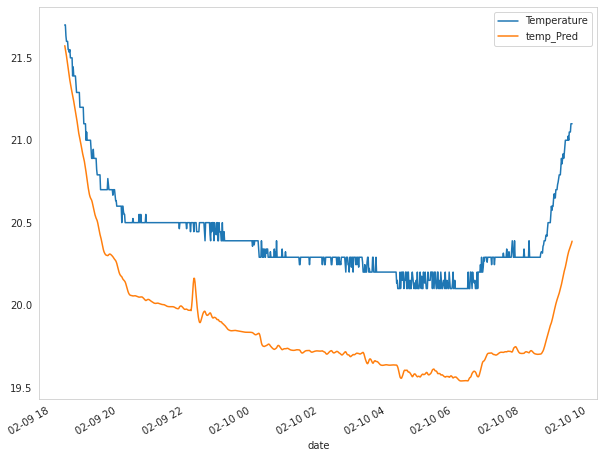

In [118]:
df_final[['Temperature','temp_Pred']].plot()
plt.show()

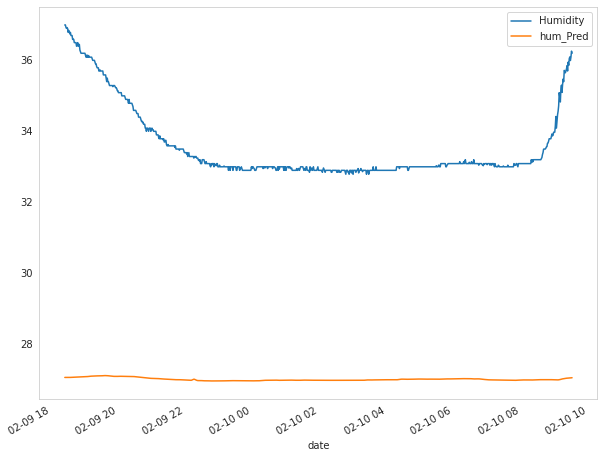

In [119]:
df_final[['Humidity','hum_Pred']].plot()
plt.show()

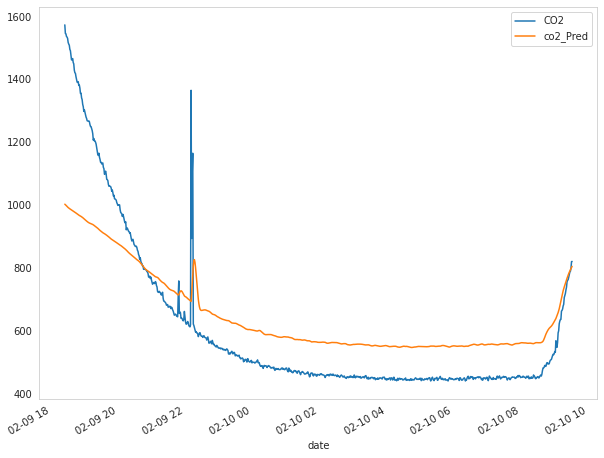

In [120]:
df_final[['CO2','co2_Pred']].plot()
plt.show()

# Prophet model

Prophet model

In [277]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False
from fbprophet import Prophet

In [278]:
#import the data
df=pd.read_csv('/content/datatraining.txt', index_col=0, parse_dates=['date'])
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [279]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8143 non-null   datetime64[ns]
 1   Temperature    8143 non-null   float64       
 2   Humidity       8143 non-null   float64       
 3   Light          8143 non-null   float64       
 4   CO2            8143 non-null   float64       
 5   HumidityRatio  8143 non-null   float64       
 6   Occupancy      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 508.9+ KB


Preprocessing

In [280]:
# Check the description
df.describe(include='all')

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
unique,8143,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-02-07 17:43:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-02-04 17:51:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-02-10 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,NaN,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,NaN,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,NaN,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000


In [281]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [282]:
# Now we have three columns for further forecasting
df=df[['date','Temperature','Humidity','CO2']]
df

,date,Temperature,Humidity,CO2
1,2015-02-04 17:51:00,23.18,27.2720,721.250000
2,2015-02-04 17:51:59,23.15,27.2675,714.000000
3,2015-02-04 17:53:00,23.15,27.2450,713.500000
4,2015-02-04 17:54:00,23.15,27.2000,708.250000
5,2015-02-04 17:55:00,23.10,27.2000,704.500000
...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,787.250000
8140,2015-02-10 09:29:59,21.05,35.9950,789.500000
8141,2015-02-10 09:30:59,21.10,36.0950,798.500000
8142,2015-02-10 09:32:00,21.10,36.2600,820.333333


In [283]:
# Check the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         8143 non-null   datetime64[ns]
 1   Temperature  8143 non-null   float64       
 2   Humidity     8143 non-null   float64       
 3   CO2          8143 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 318.1+ KB


In [284]:
print(df.shape)

(8143, 4)


In [285]:
df=df.set_index('date')

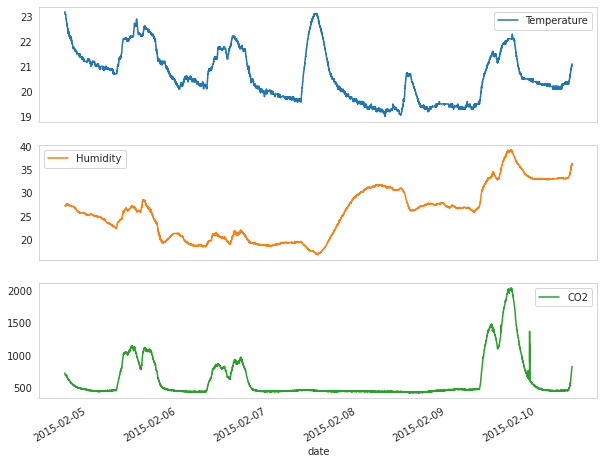

In [286]:
#plot the graph
df.plot(subplots=True)
plt.show()

In [287]:
df_final=df.reset_index()[['date','Temperature','Humidity','CO2']].rename({'date':'ds','Temperature':'y','Humidity':'Humidity','CO2':'CO2'}, axis='columns')
df_final

,ds,y,Humidity,CO2
0,2015-02-04 17:51:00,23.18,27.2720,721.250000
1,2015-02-04 17:51:59,23.15,27.2675,714.000000
2,2015-02-04 17:53:00,23.15,27.2450,713.500000
3,2015-02-04 17:54:00,23.15,27.2000,708.250000
4,2015-02-04 17:55:00,23.10,27.2000,704.500000
...,...,...,...,...
8138,2015-02-10 09:29:00,21.05,36.0975,787.250000
8139,2015-02-10 09:29:59,21.05,35.9950,789.500000
8140,2015-02-10 09:30:59,21.10,36.0950,798.500000
8141,2015-02-10 09:32:00,21.10,36.2600,820.333333


In [141]:
# Check the missing values
df_final.query('Humidity != Humidity')
# No missing values

,ds,y,Humidity,CO2


In [142]:
# Check the missing values
df_final.query('CO2 != CO2')
# No missing values

,ds,y,Humidity,CO2


Spilting the data

In [143]:
train=df_final[(df_final['ds'] >= '2015-02-04 17:51:00') & (df_final['ds'] <= '2015-02-09 14:00:59')]
test=df_final[(df_final['ds'] > '2015-02-09 14:00:59')]

In [144]:
print(train.shape)
print(test.shape)

(6971, 4)
(1172, 4)


In [145]:
test

,ds,y,Humidity,CO2
6971,2015-02-09 14:02:00,21.290,33.2225,1147.250000
6972,2015-02-09 14:03:00,21.290,33.0450,1143.500000
6973,2015-02-09 14:04:00,21.365,33.1725,1149.500000
6974,2015-02-09 14:05:00,21.390,33.3725,1164.000000
6975,2015-02-09 14:06:00,21.390,33.5000,1171.666667
...,...,...,...,...
8138,2015-02-10 09:29:00,21.050,36.0975,787.250000
8139,2015-02-10 09:29:59,21.050,35.9950,789.500000
8140,2015-02-10 09:30:59,21.100,36.0950,798.500000
8141,2015-02-10 09:32:00,21.100,36.2600,820.333333


In [146]:
# Model building
m = Prophet(interval_width=0.95)

In [147]:
m.add_regressor('Humidity',standardize=False)
m.add_regressor('CO2',standardize=False)

In [148]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [149]:
m.params

{'beta': array([[-1.69071488e-02, -2.01795513e-02,  9.35858993e-03,
          8.38013915e-03, -2.84115038e-03, -3.49467166e-03,
          8.61957626e-04,  6.89017569e-05, -4.86192972e-03,
          8.77162836e-05]]),
 'delta': array([[-0.05953891, -0.0434669 , -0.02472723, -0.00656484,  0.00909021,
          0.01662296,  0.02593674,  0.03630202,  0.04205198,  0.04641234,
          0.0506001 ,  0.05090943,  0.04686779,  0.04646418,  0.0375619 ,
          0.01474397, -0.01687667, -0.05033547, -0.04915337, -0.04382154,
         -0.03831265, -0.02455907, -0.00145519,  0.02836916,  0.0433167 ]]),
 'k': array([[-0.16375253]]),
 'm': array([[1.02386266]]),
 'sigma_obs': array([[0.01252997]]),
 'trend': array([[1.02386266, 1.02383955, 1.02381567, ..., 0.93827398, 0.93827012,
         0.9382662 ]])}

In [150]:
future = m.make_future_dataframe(periods=1172, freq='1min')
future.tail()

,ds
8138,2015-02-10 09:28:59
8139,2015-02-10 09:29:59
8140,2015-02-10 09:30:59
8141,2015-02-10 09:31:59
8142,2015-02-10 09:32:59


In [151]:
future['Humidity'] = df_final['Humidity']
future['CO2'] = df_final['CO2']

In [153]:
future

,ds,Humidity,CO2
0,2015-02-04 17:51:00,27.2720,721.250000
1,2015-02-04 17:51:59,27.2675,714.000000
2,2015-02-04 17:53:00,27.2450,713.500000
3,2015-02-04 17:54:00,27.2000,708.250000
4,2015-02-04 17:55:00,27.2000,704.500000
...,...,...,...
8138,2015-02-10 09:28:59,36.0975,787.250000
8139,2015-02-10 09:29:59,35.9950,789.500000
8140,2015-02-10 09:30:59,36.0950,798.500000
8141,2015-02-10 09:31:59,36.2600,820.333333


In [154]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8138,2015-02-10 09:28:59,19.040306,18.316048,19.739214
8139,2015-02-10 09:29:59,19.061415,18.299580,19.715866
8140,2015-02-10 09:30:59,19.073455,18.383211,19.831159
8141,2015-02-10 09:31:59,19.104293,18.405114,19.836147
8142,2015-02-10 09:32:59,19.117478,18.437421,19.887877


In [161]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(m, 'prop_temp__model.pkl')

['prop_temp__model.pkl']

In [163]:
df_final

,ds,y,Humidity,CO2
0,2015-02-04 17:51:00,23.18,27.2720,721.250000
1,2015-02-04 17:51:59,23.15,27.2675,714.000000
2,2015-02-04 17:53:00,23.15,27.2450,713.500000
3,2015-02-04 17:54:00,23.15,27.2000,708.250000
4,2015-02-04 17:55:00,23.10,27.2000,704.500000
...,...,...,...,...
8138,2015-02-10 09:29:00,21.05,36.0975,787.250000
8139,2015-02-10 09:29:59,21.05,35.9950,789.500000
8140,2015-02-10 09:30:59,21.10,36.0950,798.500000
8141,2015-02-10 09:32:00,21.10,36.2600,820.333333


In [164]:
df_final_new = df_final.rename({'y': 'temperature',}, axis=1)
df_final_new

,ds,temperature,Humidity,CO2
0,2015-02-04 17:51:00,23.18,27.2720,721.250000
1,2015-02-04 17:51:59,23.15,27.2675,714.000000
2,2015-02-04 17:53:00,23.15,27.2450,713.500000
3,2015-02-04 17:54:00,23.15,27.2000,708.250000
4,2015-02-04 17:55:00,23.10,27.2000,704.500000
...,...,...,...,...
8138,2015-02-10 09:29:00,21.05,36.0975,787.250000
8139,2015-02-10 09:29:59,21.05,35.9950,789.500000
8140,2015-02-10 09:30:59,21.10,36.0950,798.500000
8141,2015-02-10 09:32:00,21.10,36.2600,820.333333


In [165]:
temp_pred=forecast[['ds','yhat']]
temp_pred=pd.DataFrame(temp_pred)
temp_pred=temp_pred.rename({'yhat': 'pred_temperature'}, axis=1)
temp_pred

,ds,pred_temperature
0,2015-02-04 17:51:00,22.282953
1,2015-02-04 17:51:59,22.265545
2,2015-02-04 17:53:00,22.263802
3,2015-02-04 17:54:00,22.255009
4,2015-02-04 17:55:00,22.244214
...,...,...
8138,2015-02-10 09:28:59,19.040306
8139,2015-02-10 09:29:59,19.061415
8140,2015-02-10 09:30:59,19.073455
8141,2015-02-10 09:31:59,19.104293


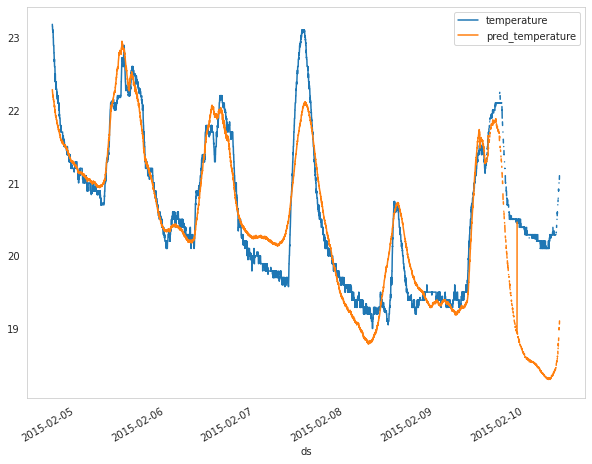

In [166]:
pd.concat([df_final_new.set_index('ds')['temperature'],temp_pred.set_index('ds')['pred_temperature']],axis=1).plot()
plt.show()

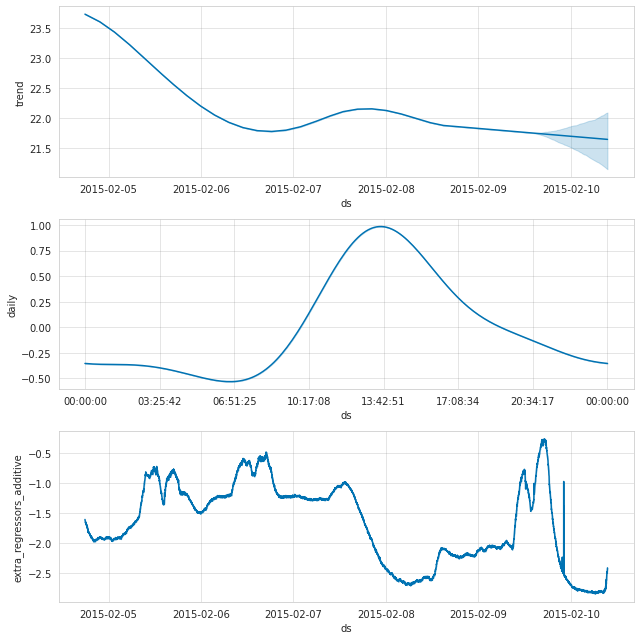

In [167]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '300 minutes', horizon = '60 minutes')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 221 forecasts with cutoffs between 2015-02-04 23:00:59 and 2015-02-09 13:00:59


  0%|          | 0/221 [00:00<?, ?it/s]

In [ ]:
df_p['rmse'][98]
# rmse for temperature

0.8093305657350855

#Humidity

In [168]:
df_final1=df.reset_index()[['date','Humidity','Temperature','CO2']].rename({'date':'ds','Humidity':'y','Temperature':'Temperature','CO2':'CO2'}, axis='columns')
df_final1

,ds,y,Temperature,CO2
0,2015-02-04 17:51:00,27.2720,23.18,721.250000
1,2015-02-04 17:51:59,27.2675,23.15,714.000000
2,2015-02-04 17:53:00,27.2450,23.15,713.500000
3,2015-02-04 17:54:00,27.2000,23.15,708.250000
4,2015-02-04 17:55:00,27.2000,23.10,704.500000
...,...,...,...,...
8138,2015-02-10 09:29:00,36.0975,21.05,787.250000
8139,2015-02-10 09:29:59,35.9950,21.05,789.500000
8140,2015-02-10 09:30:59,36.0950,21.10,798.500000
8141,2015-02-10 09:32:00,36.2600,21.10,820.333333


Splitting the data


In [169]:
train=df_final1[(df_final1['ds'] >= '2015-02-04 17:51:00') & (df_final1['ds'] <= '2015-02-09 14:00:59')]
test=df_final1[(df_final1['ds'] > '2015-02-09 14:00:59')]

In [170]:
print(train.shape)
print(test.shape)

(6971, 4)
(1172, 4)


In [171]:
test

,ds,y,Temperature,CO2
6971,2015-02-09 14:02:00,33.2225,21.290,1147.250000
6972,2015-02-09 14:03:00,33.0450,21.290,1143.500000
6973,2015-02-09 14:04:00,33.1725,21.365,1149.500000
6974,2015-02-09 14:05:00,33.3725,21.390,1164.000000
6975,2015-02-09 14:06:00,33.5000,21.390,1171.666667
...,...,...,...,...
8138,2015-02-10 09:29:00,36.0975,21.050,787.250000
8139,2015-02-10 09:29:59,35.9950,21.050,789.500000
8140,2015-02-10 09:30:59,36.0950,21.100,798.500000
8141,2015-02-10 09:32:00,36.2600,21.100,820.333333


Model building

In [172]:
# Model building
m1 = Prophet(interval_width=0.95)

In [173]:
m1.add_regressor('Temperature',standardize=False)
m1.add_regressor('CO2',standardize=False)

In [174]:
m1.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [175]:
m1.params

{'beta': array([[ 0.0132226 ,  0.02772894, -0.00295918,  0.0034728 , -0.00716466,
         -0.00239211,  0.00786975, -0.00105882, -0.03274444,  0.00040509]]),
 'delta': array([[-0.28523989, -0.21011956, -0.11873538, -0.03485267, -0.00850959,
          0.01102186,  0.05262427,  0.07735618,  0.107224  ,  0.12437458,
          0.13013172,  0.15190794,  0.20150529,  0.28078471,  0.35527089,
          0.38495513,  0.36108296,  0.27930069,  0.11864096, -0.11625145,
         -0.37185009, -0.55671899, -0.6340369 , -0.60201024, -0.45658544]]),
 'k': array([[-0.16888135]]),
 'm': array([[1.22726319]]),
 'sigma_obs': array([[0.02995844]]),
 'trend': array([[1.22726319, 1.22723937, 1.22721473, ..., 1.13482984, 1.13469897,
         1.13456588]])}

In [176]:
future1 = m1.make_future_dataframe(periods=1172, freq='1min')
future1.tail()

,ds
8138,2015-02-10 09:28:59
8139,2015-02-10 09:29:59
8140,2015-02-10 09:30:59
8141,2015-02-10 09:31:59
8142,2015-02-10 09:32:59


In [177]:
future1['Temperature'] = df_final1['Temperature']
future1['CO2'] = df_final1['CO2']

In [178]:
future1

,ds,Temperature,CO2
0,2015-02-04 17:51:00,23.18,721.250000
1,2015-02-04 17:51:59,23.15,714.000000
2,2015-02-04 17:53:00,23.15,713.500000
3,2015-02-04 17:54:00,23.15,708.250000
4,2015-02-04 17:55:00,23.10,704.500000
...,...,...,...
8138,2015-02-10 09:28:59,21.05,787.250000
8139,2015-02-10 09:29:59,21.05,789.500000
8140,2015-02-10 09:30:59,21.10,798.500000
8141,2015-02-10 09:31:59,21.10,820.333333


In [179]:
forecast1 = m1.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8138,2015-02-10 09:28:59,20.294482,15.356404,25.518657
8139,2015-02-10 09:29:59,20.313293,15.346660,25.720802
8140,2015-02-10 09:30:59,20.370030,15.241618,25.283397
8141,2015-02-10 09:31:59,20.662679,15.449344,25.791293
8142,2015-02-10 09:32:59,20.659592,15.813856,25.929310


In [180]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(m1, 'prop_lstm_model.pkl')

['prop_lstm_model.pkl']

In [181]:
df_final1

,ds,y,Temperature,CO2
0,2015-02-04 17:51:00,27.2720,23.18,721.250000
1,2015-02-04 17:51:59,27.2675,23.15,714.000000
2,2015-02-04 17:53:00,27.2450,23.15,713.500000
3,2015-02-04 17:54:00,27.2000,23.15,708.250000
4,2015-02-04 17:55:00,27.2000,23.10,704.500000
...,...,...,...,...
8138,2015-02-10 09:29:00,36.0975,21.05,787.250000
8139,2015-02-10 09:29:59,35.9950,21.05,789.500000
8140,2015-02-10 09:30:59,36.0950,21.10,798.500000
8141,2015-02-10 09:32:00,36.2600,21.10,820.333333


In [182]:
df_final1_new = df_final1.rename({'y': 'Humidity',}, axis=1)
df_final1_new

,ds,Humidity,Temperature,CO2
0,2015-02-04 17:51:00,27.2720,23.18,721.250000
1,2015-02-04 17:51:59,27.2675,23.15,714.000000
2,2015-02-04 17:53:00,27.2450,23.15,713.500000
3,2015-02-04 17:54:00,27.2000,23.15,708.250000
4,2015-02-04 17:55:00,27.2000,23.10,704.500000
...,...,...,...,...
8138,2015-02-10 09:29:00,36.0975,21.05,787.250000
8139,2015-02-10 09:29:59,35.9950,21.05,789.500000
8140,2015-02-10 09:30:59,36.0950,21.10,798.500000
8141,2015-02-10 09:32:00,36.2600,21.10,820.333333


In [183]:
hum_pred=forecast1[['ds','yhat']]
hum_pred=pd.DataFrame(hum_pred)
hum_pred=hum_pred.rename({'yhat': 'pred_Humidity'}, axis=1)
hum_pred

,ds,pred_Humidity
0,2015-02-04 17:51:00,25.279752
1,2015-02-04 17:51:59,25.221543
2,2015-02-04 17:53:00,25.224177
3,2015-02-04 17:54:00,25.160353
4,2015-02-04 17:55:00,25.174059
...,...,...
8138,2015-02-10 09:28:59,20.294482
8139,2015-02-10 09:29:59,20.313293
8140,2015-02-10 09:30:59,20.370030
8141,2015-02-10 09:31:59,20.662679


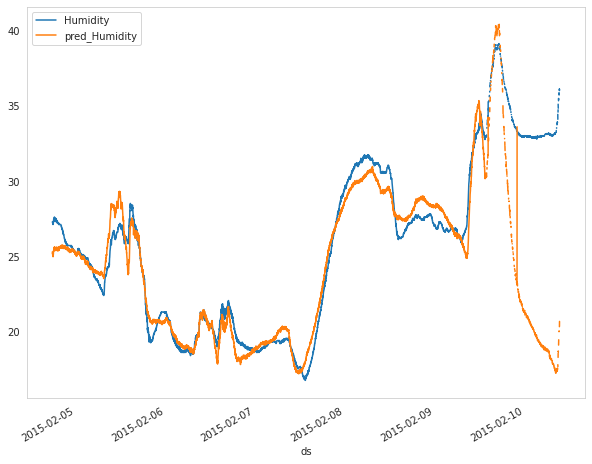

In [184]:
pd.concat([df_final1_new.set_index('ds')['Humidity'],hum_pred.set_index('ds')['pred_Humidity']],axis=1).plot()
plt.show()

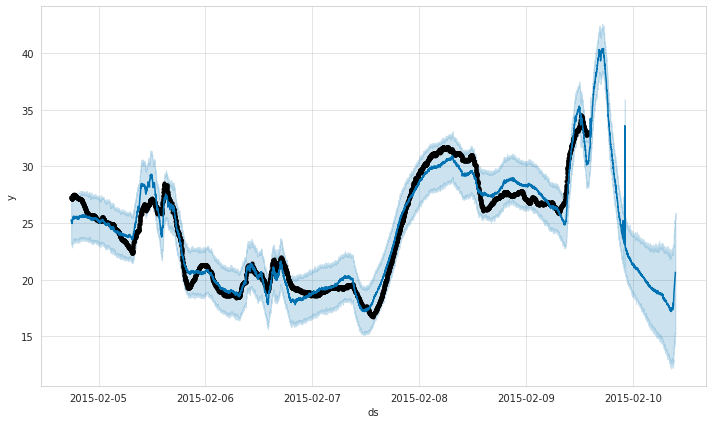

In [185]:
fig2 = m1.plot(forecast1)

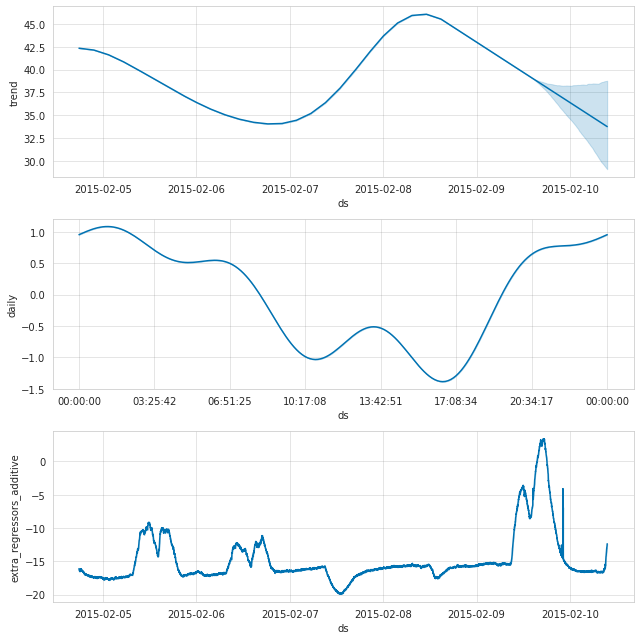

In [186]:
fig3 = m1.plot_components(forecast1)

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results1 = cross_validation( model = m1, initial = '300 minutes', horizon = '60 minutes')
df_p1 = performance_metrics(cv_results1)
df_p1

INFO:fbprophet:Making 221 forecasts with cutoffs between 2015-02-04 23:00:59 and 2015-02-09 13:00:59


  0%|          | 0/221 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 00:06:00,2.047886,1.431044,0.963775,0.038892,0.027606,0.652338
1,0 days 00:06:01,2.067237,1.437789,0.970396,0.039157,0.027799,0.648567
2,0 days 00:07:01,2.103634,1.450391,0.980316,0.039547,0.028171,0.637255
3,0 days 00:08:00,2.122494,1.456878,0.986503,0.039814,0.029271,0.631842
4,0 days 00:08:01,2.132346,1.460255,0.988579,0.039883,0.029097,0.631976
...,...,...,...,...,...,...,...
94,0 days 00:58:00,4.226793,2.055917,1.512305,0.061232,0.044992,0.462426
95,0 days 00:58:01,4.266393,2.065525,1.523082,0.061696,0.045714,0.463047
96,0 days 00:59:00,4.301215,2.073937,1.531604,0.062027,0.046733,0.459851
97,0 days 00:59:01,4.334060,2.081841,1.537051,0.062259,0.046376,0.463801


In [ ]:
df_p1['rmse'][98]

2.086409003552037

#Co2 prediction


In [288]:
df_final2=df.reset_index()[['date','CO2','Temperature','Humidity']].rename({'date':'ds','CO2':'y','Humidity':'Humidity','Temperature':'Temperature'}, axis='columns')
df_final2

,ds,y,Temperature,Humidity
0,2015-02-04 17:51:00,721.250000,23.18,27.2720
1,2015-02-04 17:51:59,714.000000,23.15,27.2675
2,2015-02-04 17:53:00,713.500000,23.15,27.2450
3,2015-02-04 17:54:00,708.250000,23.15,27.2000
4,2015-02-04 17:55:00,704.500000,23.10,27.2000
...,...,...,...,...
8138,2015-02-10 09:29:00,787.250000,21.05,36.0975
8139,2015-02-10 09:29:59,789.500000,21.05,35.9950
8140,2015-02-10 09:30:59,798.500000,21.10,36.0950
8141,2015-02-10 09:32:00,820.333333,21.10,36.2600


Spiltting the dataset

In [289]:
train=df_final2[(df_final2['ds'] >= '2015-02-04 17:51:00') & (df_final2['ds'] <= '2015-02-09 14:00:59')]
test=df_final2[(df_final2['ds'] > '2015-02-09 14:00:59')]

In [290]:
print(train.shape)
print(test.shape)

(6971, 4)
(1172, 4)


In [291]:
test

,ds,y,Temperature,Humidity
6971,2015-02-09 14:02:00,1147.250000,21.290,33.2225
6972,2015-02-09 14:03:00,1143.500000,21.290,33.0450
6973,2015-02-09 14:04:00,1149.500000,21.365,33.1725
6974,2015-02-09 14:05:00,1164.000000,21.390,33.3725
6975,2015-02-09 14:06:00,1171.666667,21.390,33.5000
...,...,...,...,...
8138,2015-02-10 09:29:00,787.250000,21.050,36.0975
8139,2015-02-10 09:29:59,789.500000,21.050,35.9950
8140,2015-02-10 09:30:59,798.500000,21.100,36.0950
8141,2015-02-10 09:32:00,820.333333,21.100,36.2600


Model building

In [292]:
# Model building
m2 = Prophet(interval_width=0.95)

In [293]:
m2.add_regressor('Humidity',standardize=False)
m2.add_regressor('Temperature',standardize=False)

In [294]:
m2.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [295]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(m2, 'Prophet_co2_model.pkl')

['Prophet_co2_model.pkl']

In [296]:
m2.params

{'beta': array([[-0.02834189, -0.01196548, -0.00430243, -0.00784592,  0.01554612,
          0.00201619, -0.01241772,  0.00419297,  0.0442589 ,  0.07548746]]),
 'delta': array([[-0.21691839,  0.57905672,  0.59423922, -2.99781854, -1.28604736,
          2.02916949, -0.06981823,  0.97588646, -0.26539359, -1.0127913 ,
         -1.62227827, -0.27107793,  1.58251358,  0.98141412, -1.14888887,
         -2.50275691, -0.34085968,  0.83051556, -1.97920666, -0.03532409,
          2.01447949,  1.51897723,  0.35119288,  2.24824848, -1.07225649]]),
 'k': array([[2.36553132]]),
 'm': array([[-2.52562704]]),
 'sigma_obs': array([[0.02563221]]),
 'trend': array([[-2.52562704, -2.5252933 , -2.52494826, ..., -2.20435453,
         -2.20417821, -2.2039989 ]])}

In [297]:
future2 = m2.make_future_dataframe(periods=1172, freq='1min')
future2.tail()

,ds
8138,2015-02-10 09:28:59
8139,2015-02-10 09:29:59
8140,2015-02-10 09:30:59
8141,2015-02-10 09:31:59
8142,2015-02-10 09:32:59


In [298]:
future2['Humidity'] = df_final2['Humidity']
future2['Temperature'] = df_final2['Temperature']

In [299]:
future2

,ds,Humidity,Temperature
0,2015-02-04 17:51:00,27.2720,23.18
1,2015-02-04 17:51:59,27.2675,23.15
2,2015-02-04 17:53:00,27.2450,23.15
3,2015-02-04 17:54:00,27.2000,23.15
4,2015-02-04 17:55:00,27.2000,23.10
...,...,...,...
8138,2015-02-10 09:28:59,36.0975,21.05
8139,2015-02-10 09:29:59,35.9950,21.05
8140,2015-02-10 09:30:59,36.0950,21.10
8141,2015-02-10 09:31:59,36.2600,21.10


In [300]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8138,2015-02-10 09:28:59,1776.837182,829.454807,2786.491775
8139,2015-02-10 09:29:59,1770.898244,823.685948,2785.108408
8140,2015-02-10 09:30:59,1783.753817,828.841991,2749.731817
8141,2015-02-10 09:31:59,1795.279501,839.729609,2794.704444
8142,2015-02-10 09:32:59,1792.101581,802.704612,2763.336875


In [301]:
df_final2

,ds,y,Temperature,Humidity
0,2015-02-04 17:51:00,721.250000,23.18,27.2720
1,2015-02-04 17:51:59,714.000000,23.15,27.2675
2,2015-02-04 17:53:00,713.500000,23.15,27.2450
3,2015-02-04 17:54:00,708.250000,23.15,27.2000
4,2015-02-04 17:55:00,704.500000,23.10,27.2000
...,...,...,...,...
8138,2015-02-10 09:29:00,787.250000,21.05,36.0975
8139,2015-02-10 09:29:59,789.500000,21.05,35.9950
8140,2015-02-10 09:30:59,798.500000,21.10,36.0950
8141,2015-02-10 09:32:00,820.333333,21.10,36.2600


In [302]:
df_final2_new = df_final2.rename({'y': 'CO2',}, axis=1)
df_final2_new

,ds,CO2,Temperature,Humidity
0,2015-02-04 17:51:00,721.250000,23.18,27.2720
1,2015-02-04 17:51:59,714.000000,23.15,27.2675
2,2015-02-04 17:53:00,713.500000,23.15,27.2450
3,2015-02-04 17:54:00,708.250000,23.15,27.2000
4,2015-02-04 17:55:00,704.500000,23.10,27.2000
...,...,...,...,...
8138,2015-02-10 09:29:00,787.250000,21.05,36.0975
8139,2015-02-10 09:29:59,789.500000,21.05,35.9950
8140,2015-02-10 09:30:59,798.500000,21.10,36.0950
8141,2015-02-10 09:32:00,820.333333,21.10,36.2600


In [303]:
co2_pred=forecast2[['ds','yhat']]
co2_pred=pd.DataFrame(co2_pred)
co2_pred=co2_pred.rename({'yhat': 'pred_Co2'}, axis=1)
co2_pred

,ds,pred_Co2
0,2015-02-04 17:51:00,722.109534
1,2015-02-04 17:51:59,718.657601
2,2015-02-04 17:53:00,717.370241
3,2015-02-04 17:54:00,714.601812
4,2015-02-04 17:55:00,709.194007
...,...,...
8138,2015-02-10 09:28:59,1776.837182
8139,2015-02-10 09:29:59,1770.898244
8140,2015-02-10 09:30:59,1783.753817
8141,2015-02-10 09:31:59,1795.279501


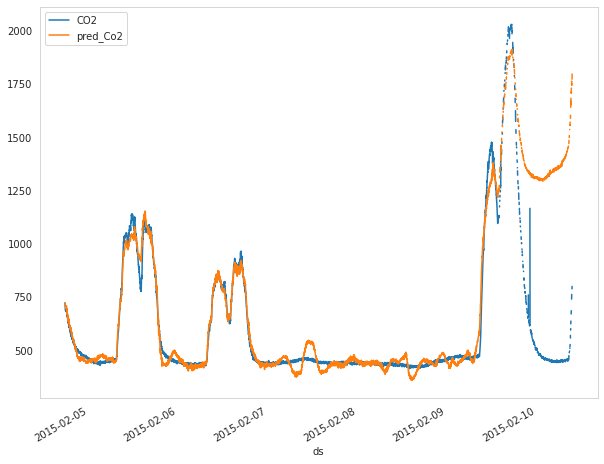

In [304]:
pd.concat([df_final2_new.set_index('ds')['CO2'],co2_pred.set_index('ds')['pred_Co2']],axis=1).plot()
plt.show()

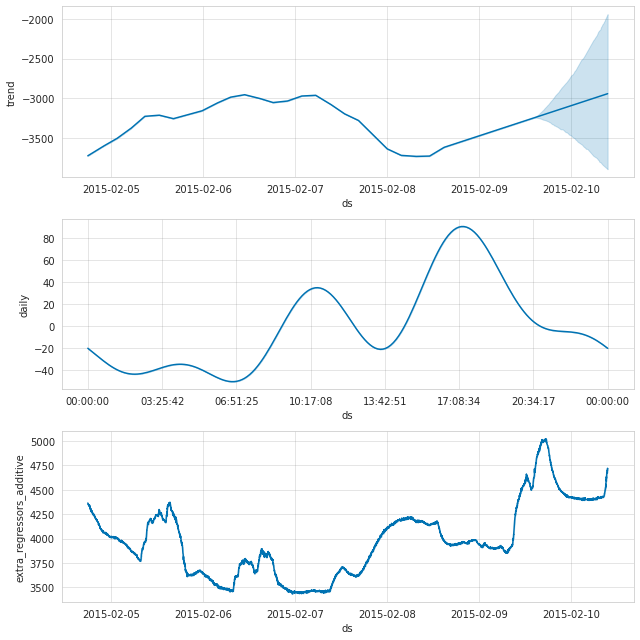

In [305]:
fig2 = m2.plot_components(forecast2)

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results2 = cross_validation( model = m2, initial = '300 minutes', horizon = '60 minutes')
df_p2 = performance_metrics(cv_results2)
df_p2

INFO:fbprophet:Making 221 forecasts with cutoffs between 2015-02-04 23:00:59 and 2015-02-09 13:00:59


  0%|          | 0/221 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 00:06:00,1493.829728,38.650094,24.209573,0.043132,0.030433,0.790347
1,0 days 00:06:01,1528.868593,39.100749,24.474294,0.043515,0.030479,0.787330
2,0 days 00:07:01,1583.487441,39.793058,25.039006,0.044416,0.031247,0.772247
3,0 days 00:08:00,1613.449651,40.167769,25.414152,0.045016,0.032056,0.765388
4,0 days 00:08:01,1622.031374,40.274451,25.531578,0.045243,0.031807,0.760935
...,...,...,...,...,...,...,...
94,0 days 00:58:00,8960.518838,94.660017,61.393399,0.102006,0.073723,0.565471
95,0 days 00:58:01,9087.529175,95.328533,61.850646,0.102832,0.075443,0.567119
96,0 days 00:59:00,9102.906693,95.409154,62.007910,0.103239,0.078177,0.566914
97,0 days 00:59:01,9382.962041,96.865691,62.748175,0.104224,0.075944,0.562594


In [ ]:
df_p2['rmse'][98]

97.15093840114058

#Conclusion

In [275]:

# Import pandas library
import pandas as pd
  
# initialize list of lists
data = [['VAR model', 0.737,7.055,328.075], ['LSTM model', 1.618,6.641,145.69], ['Prophet model', .80,2.086,97.15]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Model','RMSE_Temperature','RMSE_Humidity','RMSE_Co2'])
  
df.index = df['Model']

df=df.drop(['Model'], axis = 1)

df.head()

,RMSE_Temperature,RMSE_Humidity,RMSE_Co2
Model,,,
VAR model,0.737,7.055,328.075
LSTM model,1.618,6.641,145.690
Prophet model,0.800,2.086,97.000


The best model is prophet so we will deploy the prophet model